# Step 1: Import Libraries & Load Data

In [3]:
import pandas as pd

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/leonism/sample-superstore/master/data/superstore.csv")

In [ ]:
df.head()

# Step 2: Understand Dataset 

In [10]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55245.233297,229.858001,3.789574,0.156203,28.656896
std,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.shape

In [11]:
df.dtypes

Row ID            object
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity         float64
Discount         float64
Profit           float64
dtype: object

In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Step 3: Check for Missing and Duplicate Data

In [13]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date       806
Ship Date        806
Ship Mode        806
Customer ID      806
Customer Name    806
Segment          806
Country          806
City             806
State            806
Postal Code      817
Region           806
Product ID       806
Category         806
Sub-Category     806
Product Name     806
Sales            806
Quantity         806
Discount         806
Profit           806
dtype: int64

In [16]:
df.duplicated().sum()

504

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10800 non-null  object 
 1   Order ID       10800 non-null  object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quanti

# Step 4: Basic Summary Statistics

In [32]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55245.233297,229.858001,3.789574,0.156203,28.656896
std,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.describe(include='object')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,10296,10296,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,10001,5015,1236,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,Yes,CA-2018-100111,9/5/2017,12/16/2016,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,296,15,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


# Step 5: Most Selling Products (by Quantity)

In [23]:
top_products=df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Name
Staples                                                       215.0
Staple envelope                                               170.0
Easy-staple paper                                             150.0
Staples in misc. colors                                        86.0
KI Adjustable-Height Table                                     74.0
Avery Non-Stick Binders                                        71.0
Storex Dura Pro Binders                                        71.0
GBC Premium Transparent Covers with Diagonal Lined Pattern     67.0
Situations Contoured Folding Chairs, 4/Set                     64.0
Staple-based wall hangings                                     62.0
Name: Quantity, dtype: float64


# Step 6: Product-wise Total Sales

In [24]:
product_sales=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(product_sales)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


# Step 7: Discount Impact on Profit

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

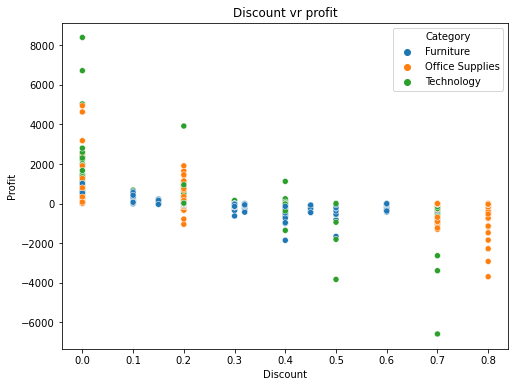

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Discount",y='Profit',hue='Category')
plt.title("Discount vr profit")
plt.show()

# Step 8: Region-wise Profit Analysis

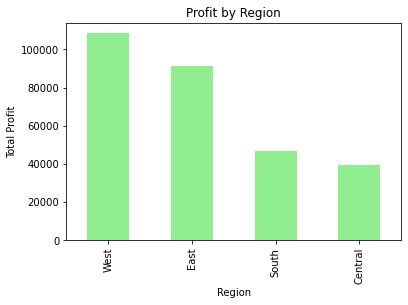

In [28]:
region_profit=df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit.plot(kind='bar',color='lightgreen',title='Profit by Region')
plt.ylabel("Total Profit")
plt.show()

# Step 9: Time Series Trend (Monthly Sales)

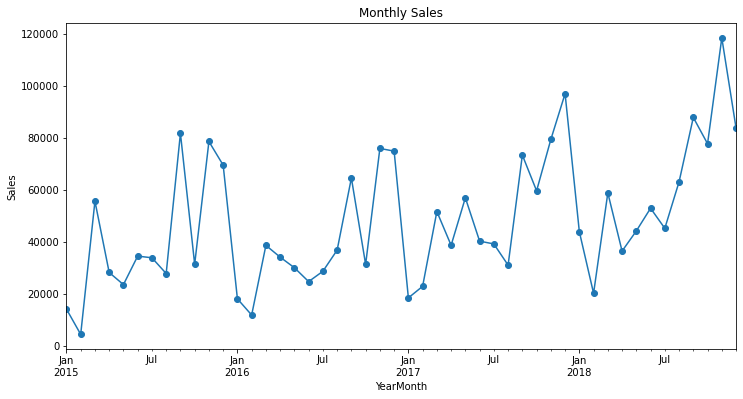

In [30]:
df['Order Date']=pd.to_datetime(df['Order Date'])

df['YearMonth'] = df['Order Date'].dt.to_period('M')

Monthly_sales=df.groupby('YearMonth')['Sales'].sum()

Monthly_sales.plot(kind='line',marker='o',figsize=(12,6),title= 'Monthly Sales')
plt.ylabel("Sales")
plt.show()


# State-wise Profit vs Loss

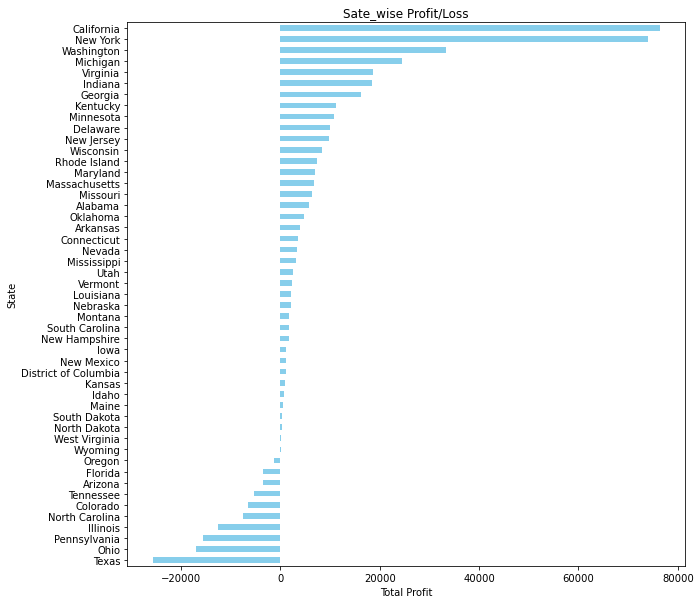

In [35]:
state_profit=df.groupby("State")['Profit'].sum().sort_values()
state_profit.plot(kind='barh',figsize=(10,10),color='skyblue')
plt.title("Sate_wise Profit/Loss")
plt.xlabel("Total Profit")
plt.show()

# Sub-Category-wise Sales and Profit Comparison

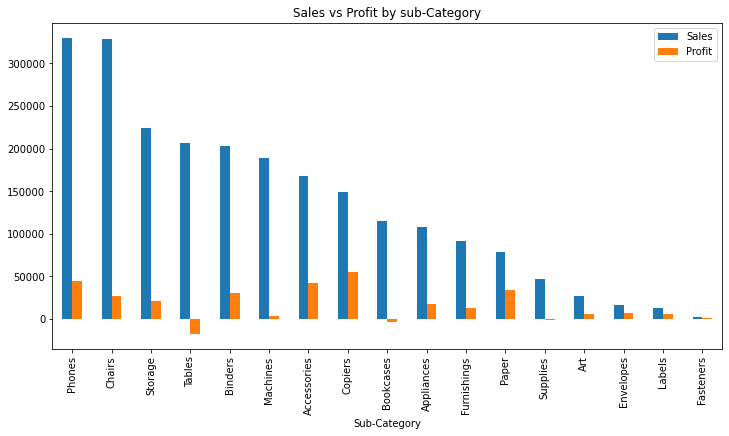

In [37]:
subcat=df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
subcat.plot(kind='bar',figsize=(12,6))
plt.title("Sales vs Profit by sub-Category")
plt.show()

# Top 10 Most Profitable Customers

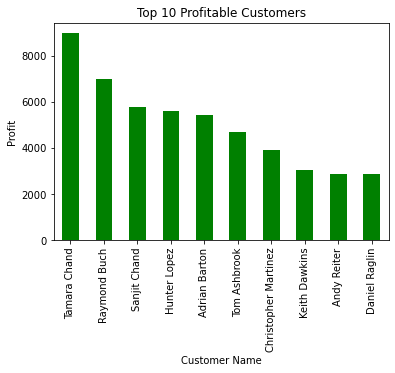

In [38]:
top_customers= df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar',title='Top 10 Profitable Customers', color='green')
plt.ylabel('Profit')
plt.show()

# Segment-wise Sales & Profit

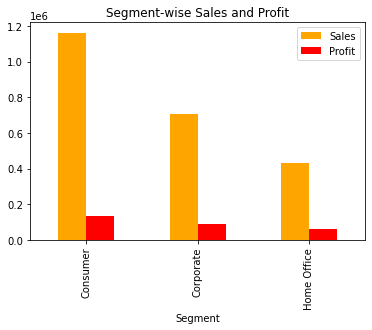

In [40]:
segment_data=df.groupby("Segment")[['Sales','Profit']].sum()
segment_data.plot(kind='bar', title='Segment-wise Sales and Profit',color=['orange','red'])
plt.show()

# Shipping Mode vs Delivery Time Analysis

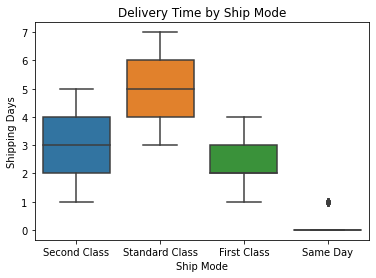

In [41]:
df['Shipping Days'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days
sns.boxplot(data=df, x='Ship Mode', y='Shipping Days')
plt.title("Delivery Time by Ship Mode")
plt.show()


# Correlation Matrix (Profit, Sales, Quantity, Discount)

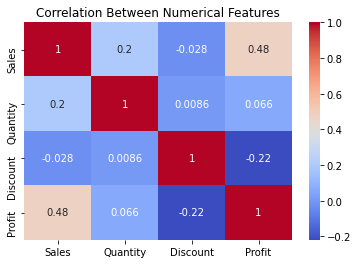

In [42]:
corr = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()


# Top 5 Products with Maximum Loss (Negative Profit)



In [43]:
loss_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(5)
print(loss_products)


Product Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bush Advantage Collection Racetrack Conference Table       -1934.3976
Name: Profit, dtype: float64
